# EDA on Telco Customer Churn Dataset

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv('../data/Telco-Customer-Churn.csv', delimiter=',')

In [67]:
data.shape

(7043, 21)

In [68]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset contains 7043 rows and 21 columns.

`TotalCharges` column is of type `object`, which means it contains non-numeric values. We will later convert it to a numeric type.

In [76]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [77]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


dataset has many more features, but we only see the numerical features in the output above, in fact many of the features are categorical, and we will need to convert them to numerical values for analysis. Let's first check for any missing values in the dataset.

In [78]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We don't have any missing values in the dataset.

We create a deep copy of the dataset to avoid modifying the original data.

In [79]:
df = data.copy(deep=True)

First we will drop the `customerID` column, as it is not useful for our analysis.

In [80]:
df = df.drop('customerID', axis=1)

We check the unique values in each column to understand the data better.

In [81]:
for col in data.columns:
    print(f'"{col}" unique values')
    print(data[col].unique())

"customerID" unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
"gender" unique values
['Female' 'Male']
"SeniorCitizen" unique values
[0 1]
"Partner" unique values
['Yes' 'No']
"Dependents" unique values
['No' 'Yes']
"tenure" unique values
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
"PhoneService" unique values
['No' 'Yes']
"MultipleLines" unique values
['No phone service' 'No' 'Yes']
"InternetService" unique values
['DSL' 'Fiber optic' 'No']
"OnlineSecurity" unique values
['No' 'Yes' 'No internet service']
"OnlineBackup" unique values
['Yes' 'No' 'No internet service']
"DeviceProtection" unique values
['No' 'Yes' 'No internet service']
"TechSupport" unique values
['No' 'Yes' 'No internet service']
"StreamingTV" unique values
['No' 'Yes' 'No internet service']


We have binary columns and categorical columns in the dataset. We will convert the binary columns to numerical values (`Yes`: `1` and `No`: `0`) and the categorical columns to dummy variables.

Dummy variables are binary variables that represent the presence or absence of a category. For example, if we have a categorical column with three categories, we will create three dummy variables, one for each category, and drop one of them to avoid multicollinearity. It is also known as [one-hot encoding](https://www.datacamp.com/tutorial/one-hot-encoding-python-tutorial). [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) provides a convenient method to create dummy variables from categorical columns using `pd.get_dummies()`.

In [82]:
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [83]:
categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


Now let's get back to the `TotalCharges` column, which is currently of type `object`. We will convert it to a numeric type. This column contains the total charges for each customer, and it should be a numeric value. However, it may contain non-numeric values, so we will use `pd.to_numeric()` to convert it.

In [84]:
df['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

we used `coerce` to convert non-numeric values to NaN, which is useful for handling errors in conversion. Now we can check for any NaN values in the `TotalCharges` column.

Despite that we didn't have any missing values in the dataset, after the conversion of `TotalCharges` column, we might have some NaN values in this column. Let's check for any NaN values in the `TotalCharges` column.

In [86]:
df['TotalCharges'].isnull().sum()

11

Now we have 11 NaN values in the `TotalCharges` column. It is likely that these values were non-numeric values in the original dataset. for example if the value was a space or an empty string, it would have been converted to NaN. Let's find these rows and see what values they contain in the original dataset.

In [91]:
data.loc[df[df['TotalCharges'].isnull()].index, 'TotalCharges']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

It appears that these rows have no charges, which is why they were converted to NaN. We can safely drop these rows from the dataset, as they do not contain any useful information.

In [94]:
df = df.dropna(subset=['TotalCharges'])
df.isna().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

now we have no NaN values in the dataset. Let's check the shape of the dataset again.

In [95]:
df.shape

(7032, 31)

The original shape was (7043, 21), and now it is (7032, 31). We have dropped 11 rows and added 10 new columns for the dummy variables.

Now let's take a look to the dataset again to see the changes we made.

In [104]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
freq,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4992,5512,4329,5512,4301,5560,5347,5511,4667,5428
mean,NaN,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


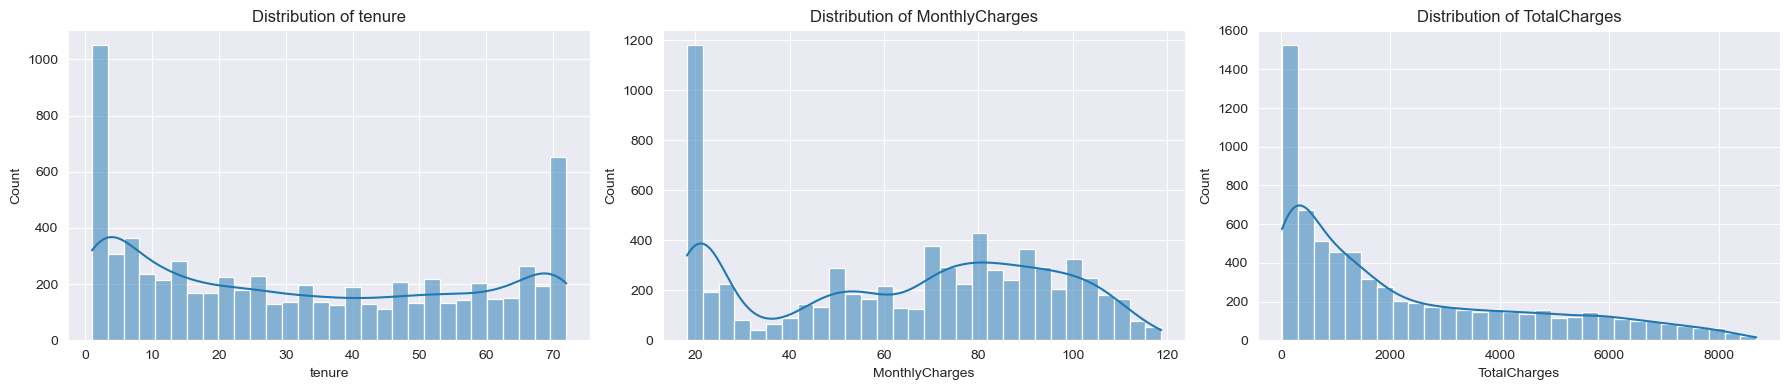

In [106]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

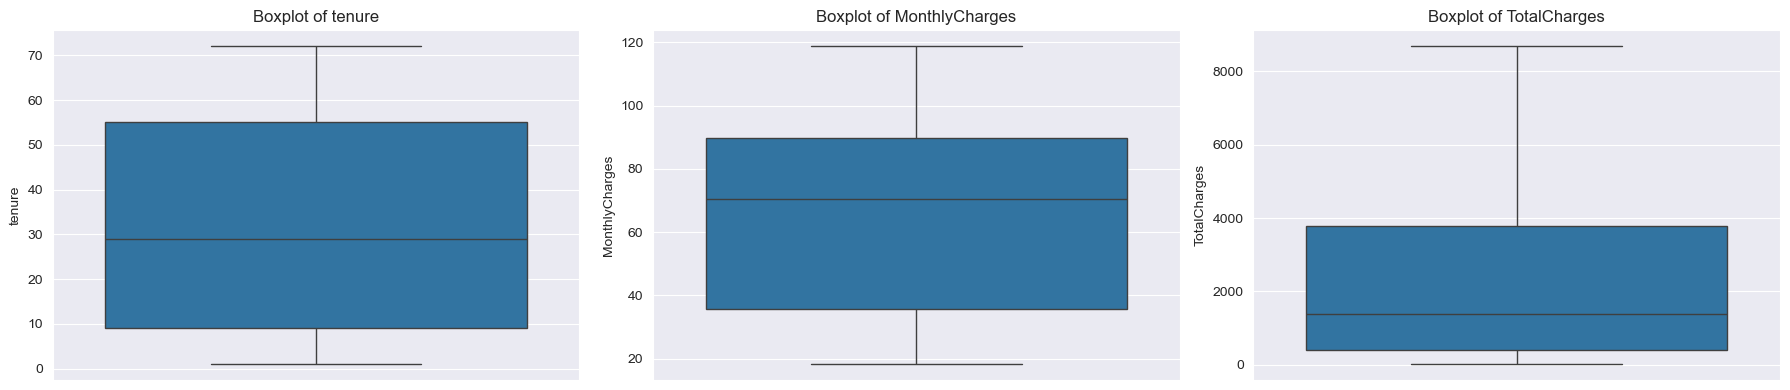

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

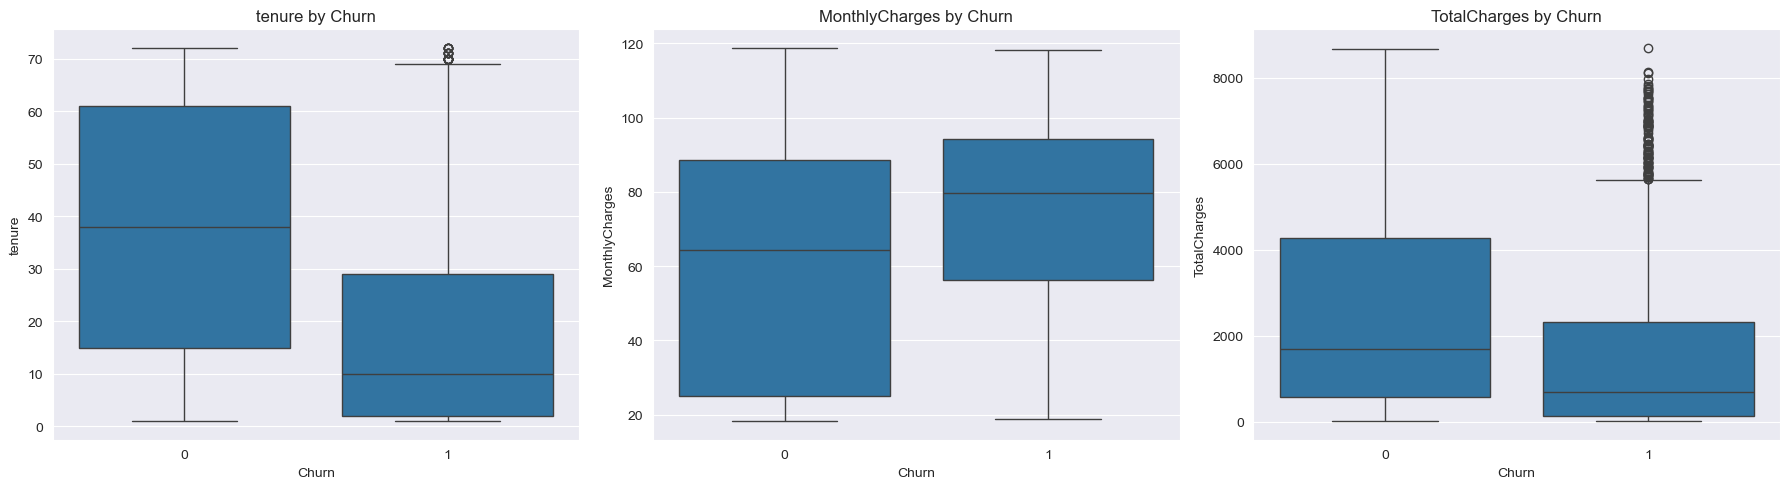

In [108]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Churn')

plt.tight_layout()
plt.show()

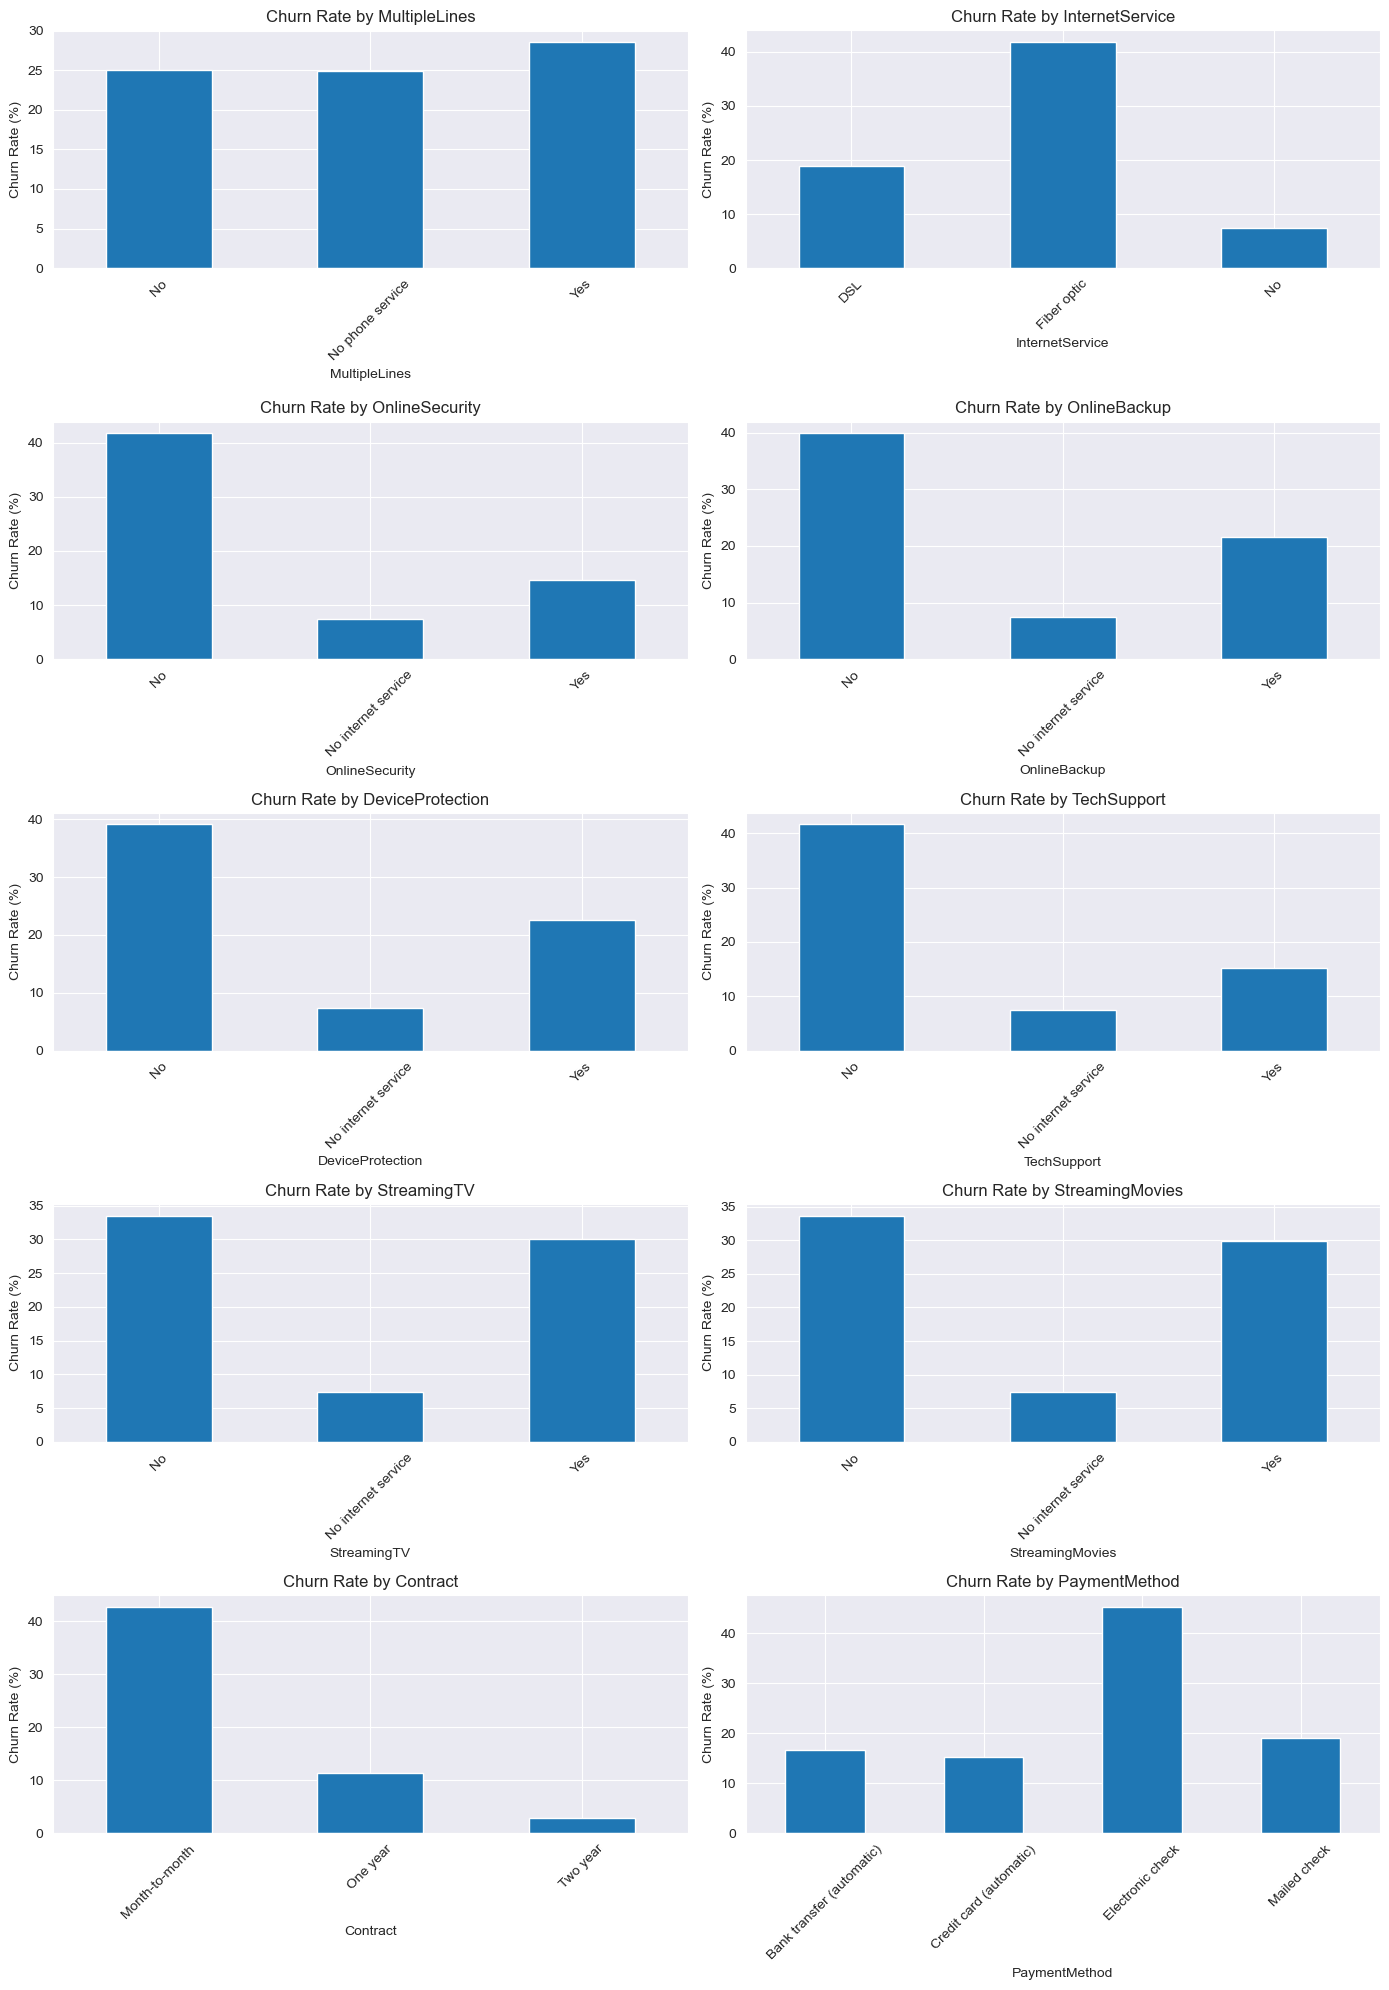

In [122]:
n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))

for i, col in enumerate(categorical_columns):
    ax = axes[i // n_cols][i % n_cols]
    try:
        churn_rates = data.groupby(col)['Churn'].value_counts(normalize=True).unstack()
        churn_rates = churn_rates['Yes'] * 100
        churn_rates.plot(kind='bar', ax=ax)
        ax.set_title(f'Churn Rate by {col}')
        ax.set_ylabel('Churn Rate (%)')
        ax.set_xlabel(col)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    except KeyError:
        ax.set_visible(False)  # hide subplot if Churn='Yes' doesn't exist

# Hide any empty subplots
for j in range(i + 1, n_rows * n_cols):
    axes[j // n_cols][j % n_cols].set_visible(False)

plt.tight_layout()
plt.show()


In [126]:
for col in categorical_columns:
    churn_rates = data.groupby(col)['Churn'].value_counts().unstack()[1] * 100
    churn_rates.plot(kind='bar', figsize=(6, 4))
    plt.ylabel('Churn Rate (%)')
    plt.title(f'Churn Rate by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

KeyError: 1